In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
import sklearn.linear_model as sl
import sklearn.metrics as sm
import seaborn as sns
import math as m

In [2]:
data = pd.read_csv('H:/Data science/Practice/27 november/Polynomial Assignment/Position_Salaries.csv')

In [3]:
df = data.copy()

In [4]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


<AxesSubplot:>

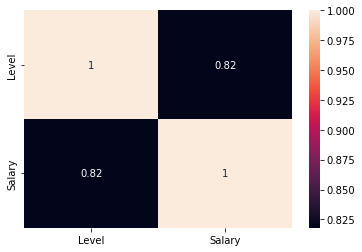

In [7]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:ylabel='Level'>

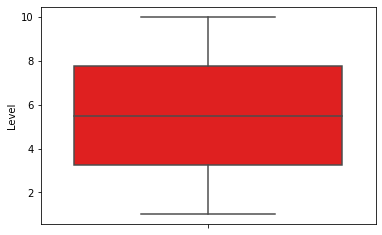

In [8]:
sns.boxplot(y='Level',color='red',data=df)

<AxesSubplot:ylabel='Salary'>

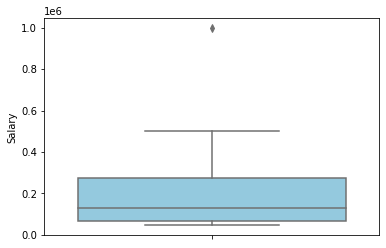

In [9]:
sns.boxplot(y='Salary',color='skyblue',data=df)

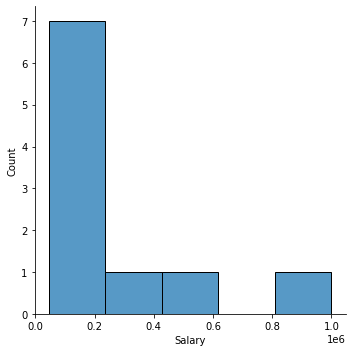

In [10]:
sns.displot(x='Salary',data=df)

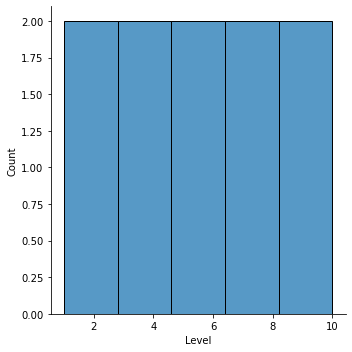

In [11]:
sns.displot(x='Level',data=df) # no needed 

# Linear Regression model_1

In [12]:
x = df[['Level']]
y = df[['Salary']]

In [13]:
lin = sl.LinearRegression()

In [14]:
s = lin.fit(x,y)

In [15]:
s.coef_

array([[80878.78787879]])

In [16]:
s.intercept_

array([-195333.33333333])

In [17]:
s.score(x,y)

0.6690412331929895

In [18]:
s.predict(x)

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

In [19]:
sm.mean_squared_error(y,s.predict(x))

26695878787.878788

In [20]:
m.sqrt(sm.mean_squared_error(y,s.predict(x)))

163388.73519272613

In [21]:
s1 = float(input('Enter the value of level'))
pred_salary = s.coef_[0][0]*s1 + s.intercept_
print(pred_salary)

Enter the value of level6.5
[330378.78787879]


In [22]:
df1 = df.copy()

In [23]:
df1['pred_salary']=s.predict(x)

In [24]:
df1

,Position,Level,Salary,pred_salary
0,Business Analyst,1,45000,-114454.545455
1,Junior Consultant,2,50000,-33575.757576
2,Senior Consultant,3,60000,47303.030303
3,Manager,4,80000,128181.818182
4,Country Manager,5,110000,209060.606061
5,Region Manager,6,150000,289939.393939
6,Partner,7,200000,370818.181818
7,Senior Partner,8,300000,451696.969697
8,C-level,9,500000,532575.757576
9,CEO,10,1000000,613454.545455


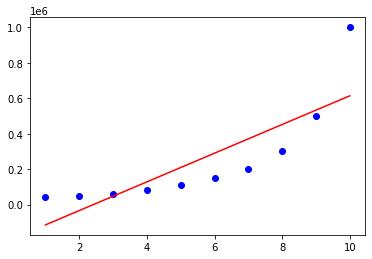

In [25]:
plt.scatter(x,y,color='blue')
plt.plot(x.values.reshape(-1,1),s.predict(x),color='red')

The above model is liner regression which 66.90% is accurate and rmse is 163388.73519272613. And also check for level value 6.5 the predicted salary is 330378.78787879.

# Polynomial Regression Model_2

In [26]:
x = df[['Level']]
y = df[['Salary']]

In [27]:
poly=sp.PolynomialFeatures(degree=4)

In [28]:
x1 = poly.fit_transform(x)

In [29]:
x1

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [30]:
lin2 = sl.LinearRegression()

In [31]:
sa = lin2.fit(x1,y)

In [32]:
sa.coef_

array([[      0.        , -211002.33100266,   94765.44289054,
         -15463.2867133 ,     890.15151515]])

In [33]:
sa.intercept_

array([184166.66666707])

In [34]:
sa.score(x1,y)

0.9973922891706614

In [35]:
sa.predict(x1)

array([[ 53356.64335681],
       [ 31759.90675996],
       [ 58642.19114221],
       [ 94632.86713289],
       [121724.94172498],
       [143275.05827508],
       [184003.49650349],
       [289994.17249411],
       [528694.63869452],
       [988916.08391594]])

In [36]:
sm.mean_squared_error(y,sa.predict(x1))

210343822.8438184

In [37]:
m.sqrt(sm.mean_squared_error(y,sa.predict(x1)))

14503.234909626832

In [38]:
lev = float(input('Enter the Level '))
a = pd.DataFrame({'level':[lev]})
a1 = sp.PolynomialFeatures(degree=4).fit_transform(a)
sa.predict(a1)

Enter the Level 6.5


array([[158862.45265153]])

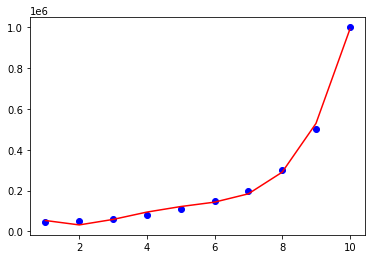

In [39]:
plt.scatter(x,y,color='blue')
plt.plot(x.values.reshape(-1,1),sa.predict(x1),color='red')

In [40]:
df2 = df.copy()

In [41]:
df2['pred_salary']=sa.predict(x1)

In [42]:
df2

,Position,Level,Salary,pred_salary
0,Business Analyst,1,45000,53356.643357
1,Junior Consultant,2,50000,31759.906760
2,Senior Consultant,3,60000,58642.191142
3,Manager,4,80000,94632.867133
4,Country Manager,5,110000,121724.941725
5,Region Manager,6,150000,143275.058275
6,Partner,7,200000,184003.496503
7,Senior Partner,8,300000,289994.172494
8,C-level,9,500000,528694.638695
9,CEO,10,1000000,988916.083916


The above model is polynomial regression which 99.73% is accurate and rmse is 14503.234909626832. And also check for level value 6.5 the predicted salary is 158862.45265153.

# Remove outliers

# Linear Regression model_3

In [43]:
df4 = df.copy()

In [44]:
df4.drop(index=9,inplace=True)

In [45]:
df4

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000


In [46]:
x = df4[['Level']]
y = df4[['Salary']]

In [47]:
linr = sl.LinearRegression()

In [48]:
sr = linr.fit(x,y)

In [49]:
sr.coef_

array([[48666.66666667]])

In [50]:
sr.intercept_

array([-77222.22222222])

In [51]:
sr.score(x,y)

0.7860365066683056

In [52]:
sm.mean_squared_error(y,sr.predict(x))

4298024691.358024

In [53]:
m.sqrt(sm.mean_squared_error(y,sr.predict(x)))

65559.32192570347

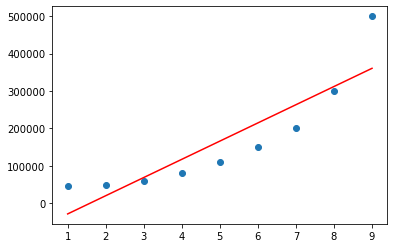

In [54]:
plt.scatter(x,y)
plt.plot(x.values.reshape(-1,1),sr.predict(x),color='red')

In [55]:
s1 = float(input('Enter the value of level'))
pred_salary = sr.coef_[0][0]*s1 + sr.intercept_
print(pred_salary)

Enter the value of level6.5
[239111.11111111]


The above model is linear regression which 78.68% is accurate and rmse is 65559.32192570347. And also check for level value 6.5 the predicted salary is 239111.11111111. which is closer to the true value than model_1

# Polynomial Regression Model_4

In [56]:
x = df4[['Level']]
y = df4[['Salary']]

In [57]:
po = sp.PolynomialFeatures(degree=4)

In [58]:
x2 = po.fit_transform(x)

In [59]:
mq = sl.LinearRegression()

In [60]:
mr = mq.fit(x2,y)

In [61]:
mr.coef_

array([[     0.        , -82716.26521636,  40115.57886561,
         -6739.83423984,    428.32167832]])

In [62]:
mr.intercept_

array([96111.1111112])

In [63]:
mr.score(x2,y)

0.9991623519986866

In [64]:
sm.mean_squared_error(y,mr.predict(x2))

16826383.493049692

In [65]:
m.sqrt(sm.mean_squared_error(y,mr.predict(x2)))

4101.997500370971

In [66]:
lev = float(input('Enter the Level '))
a = pd.DataFrame({'level':[lev]})
a1 = sp.PolynomialFeatures(degree=4).fit_transform(a)
mr.predict(a1)

Enter the Level 6.5


array([[166992.58207071]])

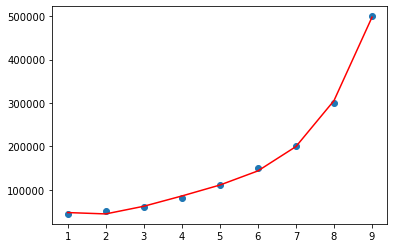

In [67]:
plt.scatter(x,y)
plt.plot(x.values.reshape(-1,1),mr.predict(x2),color='red')

The above model is polynomial regression which 99.91% is accurate and rmse is 4101.997500370971. And also check for level value 6.5 the predicted salary is 166992.58207071. which is closer to the true value than model_2 .